In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# OBJETIVOS

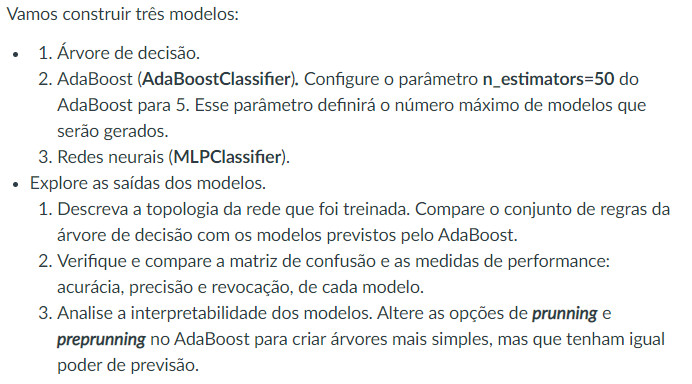

In [ ]:
from google.colab import files
uploaded = files.upload()
# Lendo o arquivo em .xlsx
dados = pd.read_excel("sonar.xlsx") 
dados.head(2)

Saving sonar.xlsx to sonar.xlsx


,Atributo_1_62,Atributo_2_63,Atributo_3_64,Atributo_4_65,Atributo_5_66,Atributo_6_67,Atributo_7_68,Atributo_8_69,Atributo_9_70,Atributo_10_71,Atributo_11_72,Atributo_12_73,Atributo_13_74,Atributo_14_75,Atributo_15_76,Atributo_16_77,Atributo_17_78,Atributo_18_79,Atributo_19_80,Atributo_20_81,Atributo_21_82,Atributo_22_83,Atributo_23_84,Atributo_24_85,Atributo_25_86,Atributo_26_87,Atributo_27_88,Atributo_28_89,Atributo_29_90,Atributo_30_91,Atributo_31_92,Atributo_32_93,Atributo_33_94,Atributo_34_95,Atributo_35_96,Atributo_36_97,Atributo_37_98,Atributo_38_99,Atributo_39_100,Atributo_40_101,Atributo_41_102,Atributo_42_103,Atributo_43_104,Atributo_44_105,Atributo_45_106,Atributo_46_107,Atributo_47_108,Atributo_48_109,Atributo_49_110,Atributo_50_111,Atributo_51_112,Atributo_52_113,Atributo_53_114,Atributo_54_115,Atributo_55_116,Atributo_56_117,Atributo_57_118,Atributo_58_119,Atributo_59_120,Atributo_60_121,Classe
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,Rocha
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.00,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,Rocha


In [ ]:
dados.describe()

,Atributo_1_62,Atributo_2_63,Atributo_3_64,Atributo_4_65,Atributo_5_66,Atributo_6_67,Atributo_7_68,Atributo_8_69,Atributo_9_70,Atributo_10_71,Atributo_11_72,Atributo_12_73,Atributo_13_74,Atributo_14_75,Atributo_15_76,Atributo_16_77,Atributo_17_78,Atributo_18_79,Atributo_19_80,Atributo_20_81,Atributo_21_82,Atributo_22_83,Atributo_23_84,Atributo_24_85,Atributo_25_86,Atributo_26_87,Atributo_27_88,Atributo_28_89,Atributo_29_90,Atributo_30_91,Atributo_31_92,Atributo_32_93,Atributo_33_94,Atributo_34_95,Atributo_35_96,Atributo_36_97,Atributo_37_98,Atributo_38_99,Atributo_39_100,Atributo_40_101,Atributo_41_102,Atributo_42_103,Atributo_43_104,Atributo_44_105,Atributo_45_106,Atributo_46_107,Atributo_47_108,Atributo_48_109,Atributo_49_110,Atributo_50_111,Atributo_51_112,Atributo_52_113,Atributo_53_114,Atributo_54_115,Atributo_55_116,Atributo_56_117,Atributo_57_118,Atributo_58_119,Atributo_59_120,Atributo_60_121
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745

In [ ]:
dados.shape

(208, 61)

# EXERCICIOS

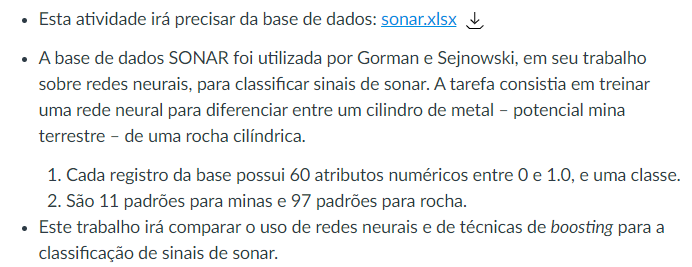

In [ ]:
#Preprocessamento dos dados - Categorização das variáveis de saída
le = LabelEncoder()
y = le.fit_transform(dados.iloc[:,(dados.shape[1]-1)])
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Separação das amostras de Treinamento e Teste - Estratificando:
X = dados.iloc[:,0:(dados.shape[1]-1)]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(145, 60) (63, 60)


In [ ]:
pd.Series(y_train).value_counts()

0    77
1    68
dtype: int64

In [ ]:
class_names = class_names = le.classes_

## Árvore de decisão

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clf.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.68      0.79      0.73        34
       Rocha       0.70      0.55      0.62        29

    accuracy                           0.68        63
   macro avg       0.69      0.67      0.67        63
weighted avg       0.68      0.68      0.68        63

       Mina(prev)  Rocha(prev)
Mina           27            7
Rocha          13           16


## Boosting

In [ ]:
# Adaboost com árvores mínimas

ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), 
                         algorithm="SAMME", n_estimators=5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm=\"SAMME\", n_estimators=20)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=20)

--------------------------------------
Acurácia da base de treinamento: 0.96
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.69      0.85      0.76        34
       Rocha       0.76      0.55      0.64        29

    accuracy                           0.71        63
   macro avg       0.73      0.70      0.70        63
weighted avg       0.72      0.71      0.71        63

       Mina(prev)  Rocha(prev)
Mina           29            5
Rocha          13           16


##Rede Neural Artificial

   Para definir o número de camadas ocultas utilizei a fórmula a seguir: (num_entradas + num_saídas) / 2.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

mlpgs = MLPClassifier(max_iter=200000)
params={'solver':('adam', 'lbfgs'), 
        'hidden_layer_sizes':[10, 20, 30, 40, 50, 60], 
        'learning_rate_init':[0.1, 0.05, 0.01, 0.005, 0.001]}

classificadorGrid = GridSearchCV(mlpgs, param_grid=params)


y_pred = classificadorGrid.fit(X, y).predict(X_test)

print("Os melhores parâmetros encontrados no conjunto de modelos testados:")

print(classificadorGrid.best_params_,'\n')

print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clf.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=['Mina', 'Rocha']))


cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Os melhores parâmetros encontrados no conjunto de modelos testados:
{'hidden_layer_sizes': 20, 'learning_rate_init': 0.1, 'solver': 'adam'} 

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.91      0.59      0.71        34
       Rocha       0.66      0.93      0.77        29

    accuracy                           0.75        63
   macro avg       0.78      0.76      0.74        63
weighted avg       0.79      0.75      0.74        63

       Mina(prev)  Rocha(prev)
Mina           20           14
Rocha           2           27


# DISCUSSÃO

**Descreva a topologia da rede que foi treinada. Compare o conjunto de regras da árvore de decisão com os modelos previstos pelo AdaBoost.**

Para o treinamento da Rede Neural foi utilizado o otimizador de hiperparâmetros Grid Search. Foram testados os parâmetros referente aos algoritmos de resolução do problema, número de neurônio e taxa de aprendizagem:
* solver:('adam', 'lbfgs')  
* hidden_layer_sizes':[10, 20, 30, 40, 50, 60] 
* learning_rate_init':[0.1, 0.05, 0.01, 0.005, 0.001]

Os melhores resultados foram obtidos com a configuração abaixo:
{'hidden_layer_sizes': 10, 'learning_rate_init': 0.005, 'solver': 'adam'} 



As regras de cada árvore de decisão no Adaboost considera o ponderamento maior nas classes que resultaram em maior erro, classes extremas, a cada etapa de treinamento das regras de decisão. Assim são treinadas várias árvores de decisão, buscando maior representatividade do ajuste a toda a base de dados apresentada. No caso da árvore de decisão, não é feita esse ajustamento de peso.




**Verifique e compare a matriz de confusão e as medidas de performance: acurácia, precisão e revocação, de cada modelo.**

Considerando os ajustes com os dados de amostragem estratificada para treinamento, tem-se os seguintes resultados:

*   O modelo de árvore de decisão com os parâmetros default, atingiu a acurácia de 100% nos resultados para treino e 63% nos resultados para teste, indicando overfitting no ajustamento. O modelo errou 10 rochas e 15 minas, resultando em um total de 25 erros para uma base de teste de 60 registros. 
*  O modelo de Adaboosting, com 5 árvores de decisão atingiu a acurácia de 0,93% nos resultados para treino e 78% nos resultados para teste, indicando overfitting no ajustamento, porém com resultado superior à árvore de decisão. O modelo errou 6 rochas e 8 minas, resultando em um total de 14 erros para uma base de teste de 60 registros.
*   O modelo neuronal, utilizando o algoritmo adam, com 10 neurônios na camada oculta e taxa de aprendizagem de 0.005 atingiu a acurácia de 100 para treinamento e 86% para teste. Esse resultado indica melhoria do overfitting se comparado aos métodos anteriores. O modelo errou 4 rochas e 5 minas, resultando em um total de 9 erros para uma base de teste de 60 registros.

**Análise a interpretabilidade dos modelos. Altere as opções de prunning e preprunning no AdaBoost para criar árvores mais simples, mas que tenham igual poder de previsão**.

***Prunning e preprunning***

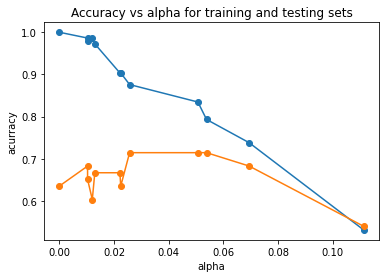

In [ ]:
treeReader = DecisionTreeClassifier()  

import matplotlib.pyplot as plt
path = treeReader.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   clfs.append(clf)

train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('acurracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label ='train')
ax.plot(ccp_alphas, test_scores, marker = 'o', label ='test');

* Não ocorreu convergência entre os resultados para treino e teste com a simulação alteração dos valores de ccp_alpha. Dessa forma podemos inferir que a simplifição nas regras de classificação não resultariam em melhoria das estimativas. 


Nos modelos de árvore de decisão à regra está relacionada à redução ou aumento do indice de entropia em função da abertura de cada nó de atributos explicativo. Assim é possível ver as decisões relacionadas a regras ruins ou boas de forma clara. Porém, dependendo do problema em questão, a quantidade de regras podem tornar a análise complexa. Por outro lado, nas redes neurais, os ajustes dos pesos com inicialização alateatório, são propagados por camada ocultas por meio de combinações algébricas a cada iteração.  Assim nesse, nesse não conseguimos analisar as regras de decisão de forma tão explicita como nos demais métodos. 